In [12]:
import pickle
import pandas as pd
import datetime as dt

from PIL.GimpGradientFile import linear

from macrosim import SeriesAccessor

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [10]:
with open('out.pkl', 'rb') as f:
    out = pickle.load(f)

In [11]:
out

,CIVPART,CPI,RWAGE,output
0,62.4,6.488339,364.0,NaN
1,62.6,6.267738,365.0,NaN
2,62.6,5.402919,366.0,NaN
3,62.7,4.882717,370.0,NaN
4,62.5,4.601332,365.0,NaN
5,[62.39980893946176],[6.332916170125651],[363.7133333333333],22688.720725
6,[62.59971259143371],[6.03093727763206],[364.72],22419.658008
7,[62.59913719992154],[5.217939296838444],[365.16333333333336],22040.467659
8,[62.69824749062124],[4.693861406364464],[367.9266666666667],21834.017778
9,[62.49747924394262],[4.425018595130818],[363.86],21668.941777


In [16]:
preds = out['output'].dropna()

fred = SeriesAccessor(
    key_path='../fred_key.env',
    key_name='FRED_KEY'
)
start = dt.datetime.fromisoformat('2002-01-01')
end = dt.datetime.fromisoformat('2024-01-01')

historical = fred.get_series(series_ids=['GDPC1'],
                             series_alias=['RDGP'],
                             date_range=(start, end))

pred_index = pd.date_range(start='2024-01-01',periods=len(preds), freq='QS')
preds.index = pred_index

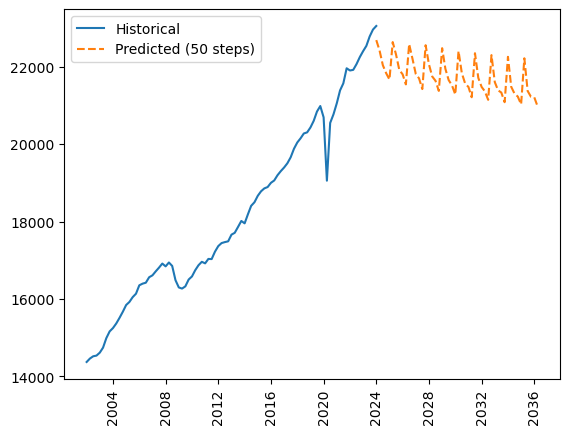

In [17]:
import matplotlib.pyplot as plt
plt.plot(historical, label='Historical')
plt.plot(preds, label='Predicted (50 steps)', linestyle='dashed')
plt.xticks(rotation=90)
plt.legend()
plt.show()

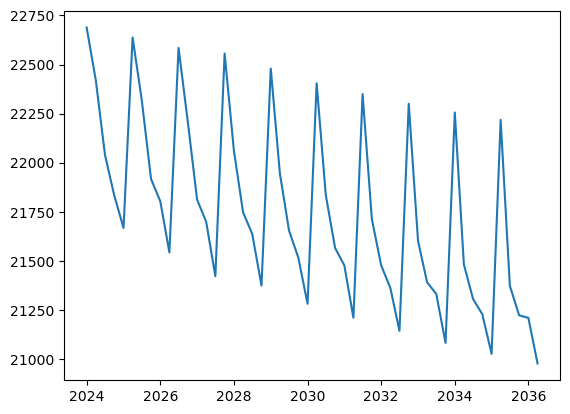

In [18]:
plt.plot(preds)

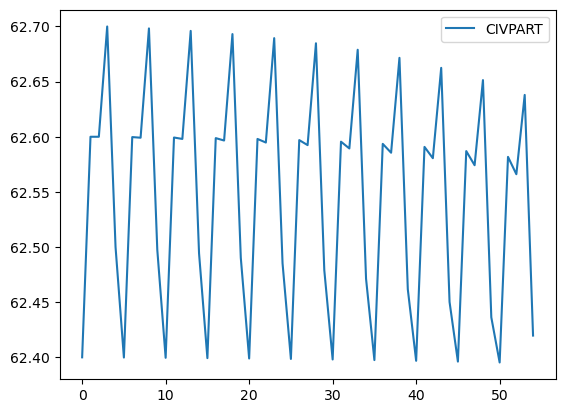

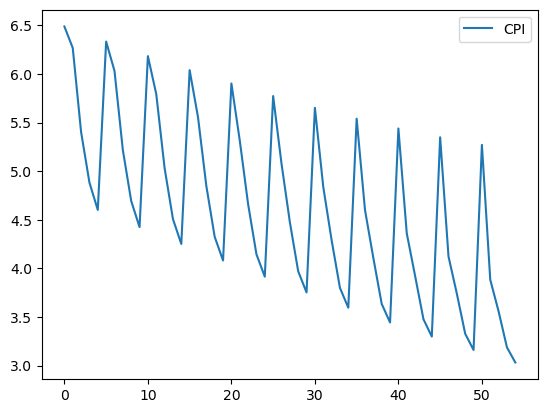

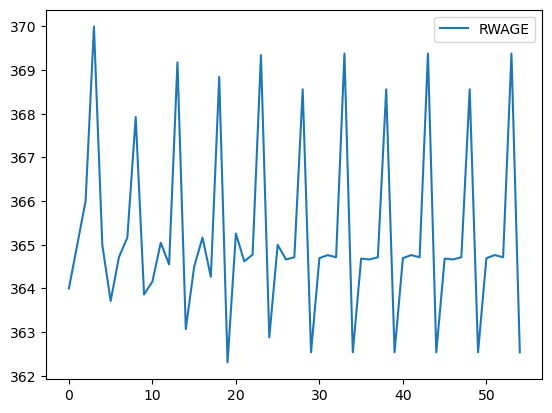

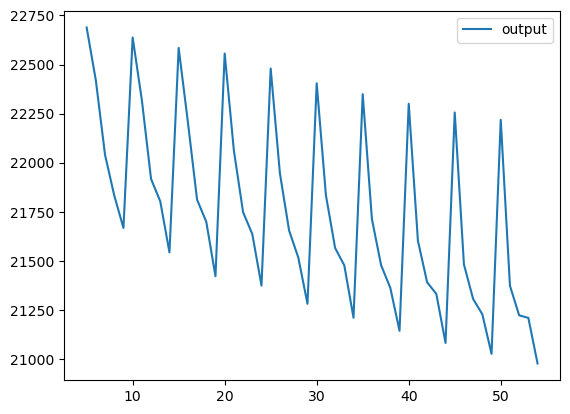

In [22]:
for col in out.columns:
    plt.plot(out[col], label=col)
    plt.legend()
    plt.show()